# AMQP

## Exchange

**Exchange** — обменник или точка обмена. В него отправляются сообщения. Exchange распределяет сообщение в одну или несколько очередей. Он маршрутизирует сообщения в очередь на основе созданных связей (bindings) между ним и очередью.

#### Direct Exchange

Direct exchange — используется, когда нужно доставить сообщение в определенные очереди. Сообщение публикуется в обменник с определенным ключом маршрутизации и попадает во все очереди, которые связаны с этим обменником аналогичным ключом маршрутизации. Ключ маршрутизации — это строка. Поиск соответствия происходит при помощи проверки строк на эквивалентность.

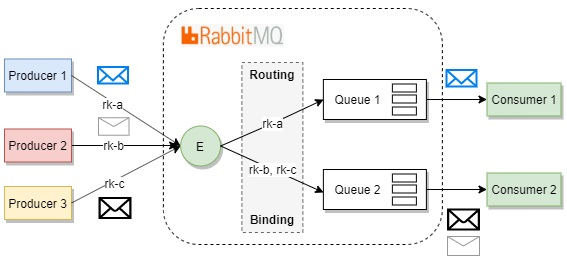

#### Topic Exchange

Topic exchange – аналогично direct exchange дает возможность осуществления выборочной маршрутизации путем сравнения ключа маршрутизации. Но, в данном случае, ключ задается по шаблону. При создании шаблона используются 0 или более слов (буквы AZ и az и цифры 0-9), разделенных точкой, а также символы * и #.

---
'*' — может быть заменен на ровно 1 слово 

'#' — может быть заменен на 0 или более слов

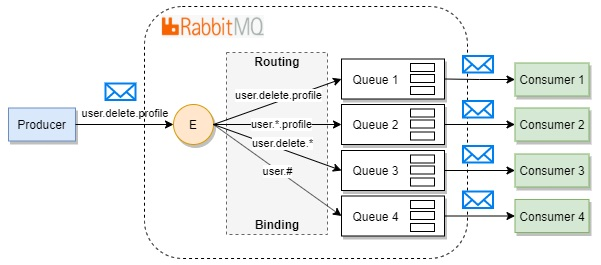

Особенности:


* применение этого обменника может стать хорошим выбором для возможного будущего развития приложения, т.к. шаблоны всегда можно настроить так, чтобы сообщение публиковалось аналогично direct exchange или fanout exchange
* шаблоны, которые используют * намного быстрее, чем шаблоны, которые используют #.
* topic exchange медленнее direct exchange

#### Fanout Exchange

Fanout exchange – все сообщения доставляются во все очереди даже если в сообщении задан ключ маршрутизации.

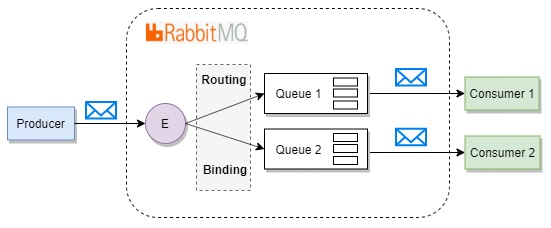

Особенности:


* RabbitMQ не работает с ключами маршрутизации и шаблонами что положительно влияет на производительность. Это самый быстрый exchange;
* все потребители должны иметь возможность обрабатывать все сообщения;

#### Headers Exchange

Headers exchange — направляет сообщения в связанные очереди на основе сравнения пар (ключ, значение) свойства headers привязки и аналогичного свойства сообщения. headers представляет собой Dictionary<ключ, значение>.

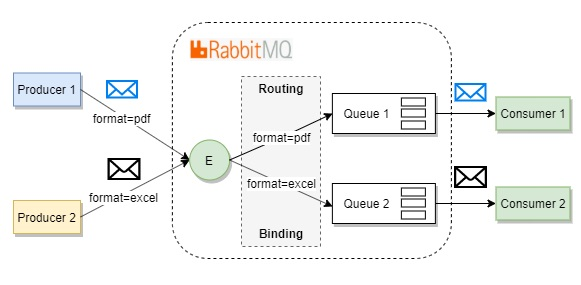

Особенности:


* дополнительная гибкость
* дополнительные накладные расходы на вычисление. Все пары (ключ, значение) атрибута headers должны сортироваться по имени ключа перед вычислением значений маршрутизации сообщения. Медленнее, чем прочие типы exchange.

#### Consistent-Hashing Exchange

Данный обменник является плагином и не встроен в RabbitMQ.


Consistent-hashing exchange (exchange с согласованным хешированием) – используется, когда есть несколько очередей, являющихся потенциальными получателями сообщения, и когда нужно сбалансировать нагрузку между ними. Связь сообщения с очередью происходит по весу (условное строковое значение от 0 - n).

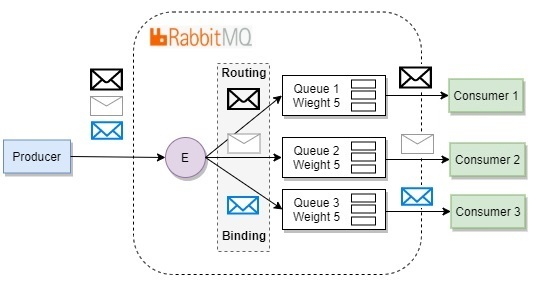


### Комбинирование обменников (E2E)

Поведение всех обменников можно комбинировать при помощи связи Exchange-to-Exchange (комбинирование обменников не входит в спецификацию AMQP. Это расширение протокола со стороны RabbitMQ).

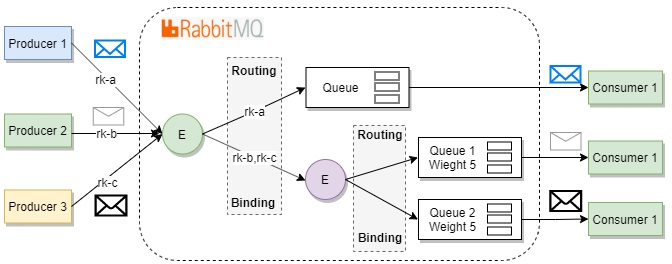

### Создание Exchange

***exchange*** — название обменника, который мы хотим создать. Название должно быть уникальным

***type*** — тип обменника

***durable*** — если установить true, то exchange будет являться постоянным. Он будет храниться на диске и сможет пережить перезапуск сервера/брокера. Если значение false, то exchange является временным и будет удаляться, когда сервер/брокер будет перезагружен

***autoDelete*** — автоматическое удаление. Exchange будет удален, когда будут удалены все связанные с ним очереди

***arguments*** — необязательные аргументы. Чаще всего, через аргументы задают alternative exchange (альтернативный обменник). Если сообщение не может пройти по первоначальному маршруту, ее можно отправить в альтернативный обменник для маршрутизации по другому пути.

## Queues и Bindings

**Queue (очередь)** — структура данных на диске или в оперативной памяти, которая хранит ссылки на сообщения и отдает их копии consumers (потребителям). Queue представляет собой Erlang-процесс с состоянием (где могут кэшироваться и сами сообщения). 1 тысяча очередей может занимать порядка 80Mb.


**Binding (привязка)** — правило, которое сообщает обменнику в какую из очередей должны попадать сообщения.

#### Создание очереди

***queue*** — название очереди, которую мы хотим создать. Название должно быть уникальным и не может совпадать с системным именем очереди

durable*** — если true, то очередь будет сохранять свое состояние и восстанавливается после перезапуска сервера/брокера

***exclusive*** — если true, то очередь будет разрешать подключаться только одному потребителю

***autoDelete*** — если true, то очередь обретает способность автоматически удалять себя

***arguments*** — необязательные аргументы. Ниже разберем подробнее.

#### Создание Binding

***queue*** — имя очереди

***exchange*** — имя обменника

***routingKey*** — ключ маршрутизации

***arguments*** — необязательные аргументы